FLO Customer Segmentation with RFM

1-Business Problem

2-Data Understanding

3-Data Preparation

4-Calculating RFM Metrics

5-Calculating RFM Scores

6-Creating & Analysing RFM Segments


In [23]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [8]:
data=pd.read_csv("C:/Users/90546/OneDrive/Masaüstü/flo_data_20k.csv")
df=data.copy()

In [9]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0000,1.0000,139.9900,799.3800,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0000,2.0000,159.9700,1853.5800,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0000,2.0000,189.9700,395.3500,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0000,1.0000,39.9900,81.9800,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0000,1.0000,49.9900,159.9900,[AKTIFSPOR]


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [16]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
first_order_date,19945,2019-03-22 16:43:55.246929152,2013-01-14 00:00:00,2019-02-16 00:00:00,2019-08-20 00:00:00,2020-01-01 00:00:00,2021-05-27 00:00:00,NaN
last_order_date,19945,2021-01-17 12:59:57.653547264,2020-05-30 00:00:00,2020-11-11 00:00:00,2021-02-10 00:00:00,2021-04-19 00:00:00,2021-05-30 00:00:00,NaN
last_order_date_online,19945,2020-08-10 01:08:52.644773376,2014-02-24 00:00:00,2020-06-18 00:00:00,2020-12-14 00:00:00,2021-04-05 00:00:00,2021-05-30 00:00:00,NaN
last_order_date_offline,19945,2020-05-17 12:07:24.021058048,2019-01-22 00:00:00,2019-11-04 00:00:00,2020-06-22 00:00:00,2020-12-25 00:00:00,2021-05-28 00:00:00,NaN
order_num_total_ever_online,19945.0000,3.1109,1.0000,1.0000,2.0000,4.0000,200.0000,4.2256
order_num_total_ever_offline,19945.0000,1.9139,1.0000,1.0000,1.0000,2.0000,109.0000,2.0629
customer_value_total_ever_offline,19945.0000,253.9226,10.0000,99.9900,179.9800,319.9700,18119.1400,301.5329
customer_value_total_ever_online,19945.0000,497.3217,12.9900,149.9800,286.4600,578.4400,45220.1300,832.6019


In [12]:
date_columns = df.columns[df.columns.str.contains("date")]
df[date_columns] = df[date_columns].apply(pd.to_datetime)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

In [14]:
df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [18]:
df["Total_transaction"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
df["TotalValue"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,Total_transaction,TotalValue
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0000,1.0000,139.9900,799.3800,[KADIN],5.0000,939.3700
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0000,2.0000,159.9700,1853.5800,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0000,2013.5500
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0000,2.0000,189.9700,395.3500,"[ERKEK, KADIN]",5.0000,585.3200
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0000,1.0000,39.9900,81.9800,"[AKTIFCOCUK, COCUK]",2.0000,121.9700
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0000,1.0000,49.9900,159.9900,[AKTIFSPOR],2.0000,209.9800


Distribution of the number of customers in shopping channels, the total number of products purchased and total expenditures.

In [ ]:
grouped_by_order=df.groupby("order_channel").agg({"master_id":"count",
                                 "Total_transaction":"sum",
                                 "TotalValue":"sum"})
grouped_by_order

,master_id,Total_transaction,TotalValue
order_channel,,,
Android App,9495,52269.0000,7819062.7600
Desktop,2735,10920.0000,1610321.4600
Ios App,2833,15351.0000,2525999.9300
Mobile,4882,21679.0000,3028183.1600


Visulation distribution of master ıd, total transaction(total order for each id) and total value based on Order Channel:

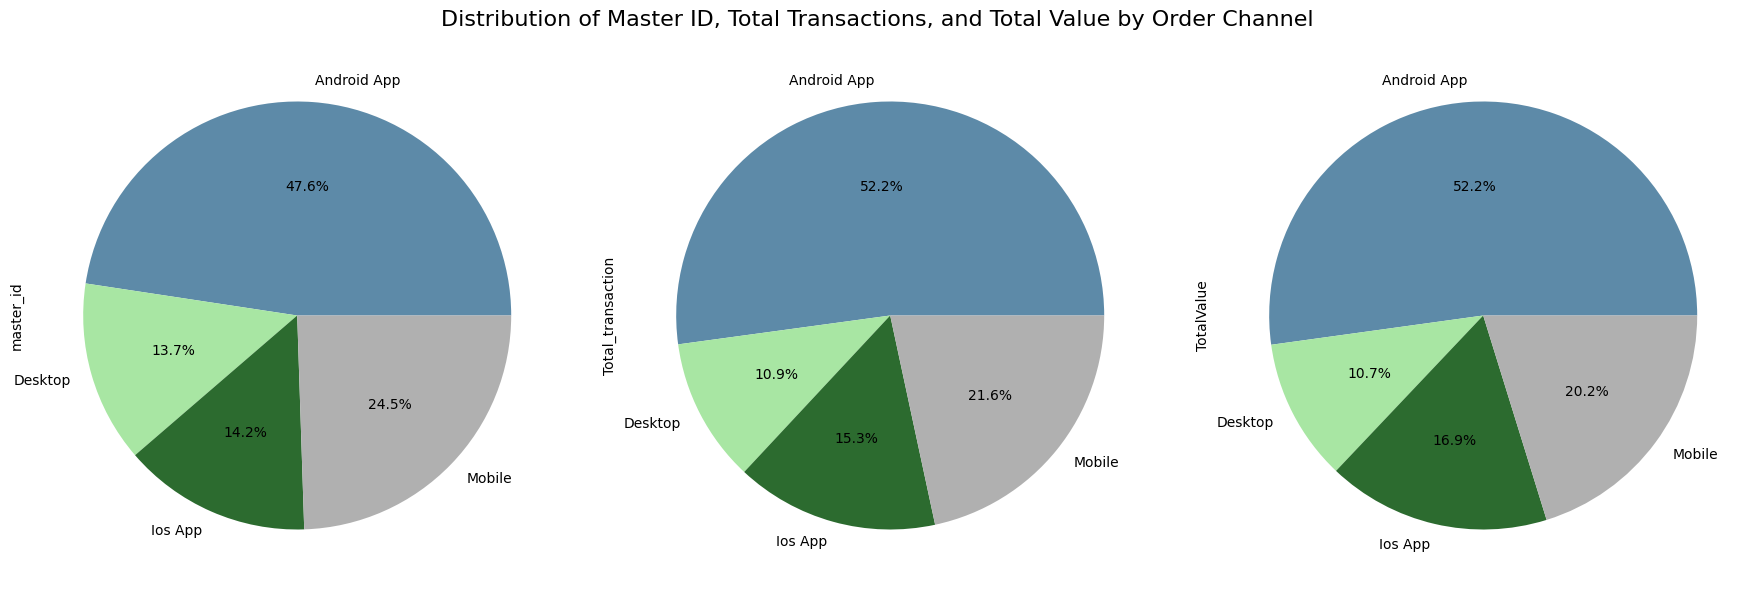

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
colors = ['#5D8AA8', '#A8E6A3', '#2C6B2F', '#B0B0B0']

grouped_by_order['master_id'].plot(kind="pie",  ax=axes[0], autopct='%1.1f%%',colors=colors)
grouped_by_order['Total_transaction'].plot(kind="pie", ax=axes[1] ,autopct='%1.1f%%',colors=colors)
grouped_by_order['TotalValue'].plot(kind="pie", ax=axes[2] ,autopct='%1.1f%%',colors=colors)

fig.suptitle("Distribution of Master ID, Total Transactions, and Total Value by Order Channel", fontsize=16)

plt.tight_layout()
plt.show()

In [68]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
first_order_date,19945,2019-03-22 16:43:55.246929152,2013-01-14 00:00:00,2019-02-16 00:00:00,2019-08-20 00:00:00,2020-01-01 00:00:00,2021-05-27 00:00:00,NaN
last_order_date,19945,2021-01-17 12:59:57.653547264,2020-05-30 00:00:00,2020-11-11 00:00:00,2021-02-10 00:00:00,2021-04-19 00:00:00,2021-05-30 00:00:00,NaN
last_order_date_online,19945,2020-08-10 01:08:52.644773376,2014-02-24 00:00:00,2020-06-18 00:00:00,2020-12-14 00:00:00,2021-04-05 00:00:00,2021-05-30 00:00:00,NaN
last_order_date_offline,19945,2020-05-17 12:07:24.021058048,2019-01-22 00:00:00,2019-11-04 00:00:00,2020-06-22 00:00:00,2020-12-25 00:00:00,2021-05-28 00:00:00,NaN
order_num_total_ever_online,19945.0000,3.1109,1.0000,1.0000,2.0000,4.0000,200.0000,4.2256
order_num_total_ever_offline,19945.0000,1.9139,1.0000,1.0000,1.0000,2.0000,109.0000,2.0629
customer_value_total_ever_offline,19945.0000,253.9226,10.0000,99.9900,179.9800,319.9700,18119.1400,301.5329
customer_value_total_ever_online,19945.0000,497.3217,12.9900,149.9800,286.4600,578.4400,45220.1300,832.6019
Total_transaction,19945.0000,5.0248,2.0000,3.0000,4.0000,6.0000,202.0000,4.7427
TotalValue,19945.0000,751.2443,44.9800,339.9800,545.2700,897.7800,45905.1000,895.4022


Top 10 customers with the most profits:

In [69]:
df.sort_values("TotalValue",ascending=False).head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,Total_transaction,TotalValue
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.0000,2.0000,684.9700,45220.1300,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.0000,45905.1000
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,Android App,Android App,2018-08-06,2021-02-23,2021-02-23,2020-07-06,67.0000,1.0000,130.4900,36687.8000,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",68.0000,36818.2900
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.0000,1.0000,1263.7600,32654.3400,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.0000,33918.1000
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,Ios App,Offline,2021-03-01,2021-04-13,2021-03-18,2021-04-13,10.0000,1.0000,538.9400,30688.4700,"[ERKEK, KADIN, AKTIFSPOR]",11.0000,31227.4100
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,Android App,Offline,2021-04-07,2021-04-27,2021-04-07,2021-04-27,1.0000,3.0000,18119.1400,2587.2000,[AKTIFSPOR],4.0000,20706.3400
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.0000,4.0000,843.6800,17599.8900,"[ERKEK, KADIN, AKTIFSPOR]",70.0000,18443.5700
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.0000,1.0000,82.4800,16836.0900,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",70.0000,16918.5700
163,fef57ffa-aae6-11e9-a2fc-000d3a38a36f,Mobile,Desktop,2016-11-08,2021-05-12,2021-05-12,2020-07-09,36.0000,1.0000,180.7300,12545.3700,"[ERKEK, AKTIFSPOR]",37.0000,12726.1000
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.0000,1.0000,49.9900,12232.2500,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.0000,12282.2400
18767,fc0ce7a4-9d87-11e9-9897-000d3a38a36f,Desktop,Desktop,2018-11-24,2020-11-11,2020-11-11,2019-12-06,18.0000,2.0000,64.9700,12038.1800,"[ERKEK, KADIN]",20.0000,12103.1500


Top 10 customers who have max orders:

In [70]:
df.sort_values("Total_transaction",ascending=False).head(10)


,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,Total_transaction,TotalValue
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.0000,2.0000,684.9700,45220.1300,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.0000,45905.1000
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.0000,1.0000,49.9900,12232.2500,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.0000,12282.2400
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,Android App,Offline,2019-08-07,2020-11-04,2020-09-07,2020-11-04,2.0000,109.0000,10239.4600,143.9800,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",111.0000,10383.4400
2619,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,Android App,Offline,2018-10-18,2020-06-30,2018-10-18,2020-06-30,1.0000,87.0000,8432.2500,139.9800,[ERKEK],88.0000,8572.2300
6322,329968c6-a0e2-11e9-a2fc-000d3a38a36f,Ios App,Ios App,2019-02-14,2021-04-05,2021-04-05,2020-02-17,2.0000,81.0000,3997.5500,242.8100,[ERKEK],83.0000,4240.3600
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.0000,1.0000,1263.7600,32654.3400,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.0000,33918.1000
9347,44d032ee-a0d4-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2019-02-11,2021-02-11,2021-02-11,2020-12-24,3.0000,74.0000,4640.7700,543.2800,"[KADIN, AKTIFSPOR]",77.0000,5184.0500
10954,b27e241a-a901-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2015-09-12,2021-04-01,2021-04-01,2019-10-08,72.0000,3.0000,292.9300,5004.9500,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",75.0000,5297.8800
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.0000,4.0000,843.6800,17599.8900,"[ERKEK, KADIN, AKTIFSPOR]",70.0000,18443.5700
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.0000,1.0000,82.4800,16836.0900,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",70.0000,16918.5700


CALCULATING RFM METRICS (recency, frequency,monetary) : 
recency: difference between the customer's last purchase and the day of analysis.So we need to select day for analyze.
frequency: number of order 
monetary: amount of total value that customer pay.

In [72]:
df["last_order_date"].max()

Timestamp('2021-05-30 00:00:00')

In [ ]:
analyze_date=dt.datetime(2021, 6, 1)

In [77]:
rfm=df.groupby("master_id").agg({"last_order_date":lambda date: (analyze_date-date.max()).days, #recency
                             "Total_transaction": lambda x: x.sum(),                        #frequency
                             "TotalValue": lambda value: value.sum()})                      #monetary
rfm

,last_order_date,Total_transaction,TotalValue
master_id,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,11,5.0000,776.0700
00034aaa-a838-11e9-a2fc-000d3a38a36f,299,3.0000,269.4700
000be838-85df-11ea-a90b-000d3a38a36f,214,4.0000,722.6900
000c1fe2-a8b7-11ea-8479-000d3a38a36f,28,7.0000,874.1600
000f5e3e-9dde-11ea-80cd-000d3a38a36f,21,7.0000,1620.3300
...,...,...,...
fff1db94-afd9-11ea-b736-000d3a38a36f,184,5.0000,796.8700
fff4736a-60a4-11ea-8dd8-000d3a38a36f,68,2.0000,318.8700
fffacd34-ae14-11e9-a2fc-000d3a38a36f,258,6.0000,983.9200


In [82]:
rfm.columns=["recency","frequency","monetary"]
rfm.reset_index()

,master_id,recency,frequency,monetary
0,00016786-2f5a-11ea-bb80-000d3a38a36f,11,5.0000,776.0700
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,299,3.0000,269.4700
2,000be838-85df-11ea-a90b-000d3a38a36f,214,4.0000,722.6900
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,28,7.0000,874.1600
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,21,7.0000,1620.3300
...,...,...,...,...
19940,fff1db94-afd9-11ea-b736-000d3a38a36f,184,5.0000,796.8700
19941,fff4736a-60a4-11ea-8dd8-000d3a38a36f,68,2.0000,318.8700
19942,fffacd34-ae14-11e9-a2fc-000d3a38a36f,258,6.0000,983.9200
19943,fffacecc-ddc3-11e9-a848-000d3a38a36f,133,9.0000,1362.2000


In [85]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,19945.0000,135.4584,103.2811,3.0000,44.0000,112.0000,203.0000,368.0000
frequency,19945.0000,5.0248,4.7427,2.0000,3.0000,4.0000,6.0000,202.0000
monetary,19945.0000,751.2443,895.4022,44.9800,339.9800,545.2700,897.7800,45905.1000


In [86]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19945 entries, 00016786-2f5a-11ea-bb80-000d3a38a36f to fffe4b30-18e0-11ea-9213-000d3a38a36f
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   recency    19945 non-null  int64  
 1   frequency  19945 non-null  float64
 2   monetary   19945 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 623.3+ KB


We'll make an score that called rfm score to segmantation with qcut() method. But qcut just can apply for numerical data so we need to change type of recency column as numeric data.

In [87]:
rfm["recency"] = pd.to_numeric(rfm["recency"])

Now , need to calculating rfm score:

In [92]:
rfm["recency_score"]=pd.qcut(rfm["recency"], 5, labels=[5,4,3,2,1])
rfm["frequency_score"]=pd.qcut(rfm["frequency"].rank(method="first"), 5, labels=[1,2,3,4,5])
rfm["monetary_score"]=pd.qcut(rfm["monetary"], 5, labels=[1,2,3,4,5])
rfm

,recency,frequency,monetary,recency_score,frequency_score,monetary_score
master_id,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,11,5.0000,776.0700,5,4,4
00034aaa-a838-11e9-a2fc-000d3a38a36f,299,3.0000,269.4700,1,2,1
000be838-85df-11ea-a90b-000d3a38a36f,214,4.0000,722.6900,2,3,4
000c1fe2-a8b7-11ea-8479-000d3a38a36f,28,7.0000,874.1600,5,4,4
000f5e3e-9dde-11ea-80cd-000d3a38a36f,21,7.0000,1620.3300,5,4,5
...,...,...,...,...,...,...
fff1db94-afd9-11ea-b736-000d3a38a36f,184,5.0000,796.8700,2,4,4
fff4736a-60a4-11ea-8dd8-000d3a38a36f,68,2.0000,318.8700,4,2,2
fffacd34-ae14-11e9-a2fc-000d3a38a36f,258,6.0000,983.9200,1,4,4


In [97]:
rfm["RFM_SCORE"] = (rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str) + rfm["monetary_score"].astype(str))
rfm["RF_SCORE"] = (rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str))
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rf_score,RFM_SCORE,RF_SCORE
master_id,,,,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,11,5.0000,776.0700,5,4,4,master_id\n00016786-2f5a-11ea-bb80-000d3a38a36...,544,54
00034aaa-a838-11e9-a2fc-000d3a38a36f,299,3.0000,269.4700,1,2,1,master_id\n00016786-2f5a-11ea-bb80-000d3a38a36...,121,12
000be838-85df-11ea-a90b-000d3a38a36f,214,4.0000,722.6900,2,3,4,master_id\n00016786-2f5a-11ea-bb80-000d3a38a36...,234,23
000c1fe2-a8b7-11ea-8479-000d3a38a36f,28,7.0000,874.1600,5,4,4,master_id\n00016786-2f5a-11ea-bb80-000d3a38a36...,544,54
000f5e3e-9dde-11ea-80cd-000d3a38a36f,21,7.0000,1620.3300,5,4,5,master_id\n00016786-2f5a-11ea-bb80-000d3a38a36...,545,54


In [100]:
seg_map={
r'[1-2][1-2]': 'hibernating',
r'[1-2][3-4]': 'at_Risk',
r'[1-2]5': 'cant_loose',
r'3[1-2]': 'about_to_sleep',
r'33': 'need_attention',
r'[3-4][4-5]': 'loyal_customers',
r'41': 'promising',
r'51': 'new_customers',
r'[4-5][2-3]': 'potential_loyalists',
r'5[4-5]':'champions'}


In [110]:
rfm["segment"] = rfm["RF_SCORE"].replace(seg_map, regex=True)
rfm.reset_index(inplace=True)
rfm.head()

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rf_score,RFM_SCORE,RF_SCORE,segment
0,00016786-2f5a-11ea-bb80-000d3a38a36f,11,5.0000,776.0700,5,4,4,master_id\n00016786-2f5a-11ea-bb80-000d3a38a36...,544,54,champions
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,299,3.0000,269.4700,1,2,1,master_id\n00016786-2f5a-11ea-bb80-000d3a38a36...,121,12,hibernating
2,000be838-85df-11ea-a90b-000d3a38a36f,214,4.0000,722.6900,2,3,4,master_id\n00016786-2f5a-11ea-bb80-000d3a38a36...,234,23,at_Risk
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,28,7.0000,874.1600,5,4,4,master_id\n00016786-2f5a-11ea-bb80-000d3a38a36...,544,54,champions
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,21,7.0000,1620.3300,5,4,5,master_id\n00016786-2f5a-11ea-bb80-000d3a38a36...,545,54,champions


statistical overview of segments :

In [113]:
rfm[["segment","recency","frequency","monetary"]].groupby("segment").agg(["min","max","mean","count"])

recency                     frequency                   \
                        min  max     mean count       min      max    mean   
segment                                                                      
about_to_sleep           85  146 115.0316  1643    2.0000   3.0000  2.4066   
at_Risk                 147  368 243.3290  3152    3.0000   7.0000  4.4702   
cant_loose              147  368 236.1591  1194    7.0000 111.0000 10.7169   
champions                 3   34  18.1422  1920    4.0000 202.0000  8.9651   
hibernating             147  368 248.4263  3589    2.0000   3.0000  2.3915   
loyal_customers          35  146  83.5579  3375    4.0000  83.0000  8.3564   
need_attention           85  146 114.0372   806    3.0000   4.0000  3.7395   
new_customers             3   34  18.9762   673    2.0000   2.0000  2.0000   
potential_loyalists       3   84  37.8697  2925    2.0000   4.0000  3.3108   
promising                35   84  59.6946   668    2.0000   2.0000  2.0000   

                          monetary                             
                    count      min        max      mean count  
segment                                                        
about_to_sleep       1643  49.9800  1607.4500  361.6494  1643  
at_Risk              3152 115.8800  3615.6700  648.3250  3152  
cant_loose           1194 274.4200 12103.1500 1481.6524  1194  
champions            1920 132.9400 45905.1000 1410.7089  1920  
hibernating          3589  44.9800  2533.0400  362.5833  3589  
loyal_customers      3375 208.4600 36818.2900 1216.2572  3375  
need_attention        806  80.8600  4361.4400  553.4366   806  
new_customers         673  65.9100  1725.3800  344.0495   673  
potential_loyalists  2925  69.9800 20706.3400  533.7413  2925  
promising             668  44.9800  1357.3200  334.1533   668

CASE STUDY 1 
FLO is adding a new women's shoe brand. The product prices of the included brand are above general customer preferences. For this reason, it is desired to specifically contact customers with the profile that will be interested in the promotion of the brand and product sales. Loyal customers (champions, loyal_customers) and people who shop in the female category are the customers to be contacted specifically. Save the ID numbers of these customers in the csv file.

according to the case study we need also shopping category. Lets merge rfm table and category column:

In [115]:
rfm = pd.merge(rfm, df[["master_id","interested_in_categories_12"]], on="master_id", how="left")
rfm.head()

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rf_score,RFM_SCORE,RF_SCORE,segment,interested_in_categories_12_x,interested_in_categories_12_y
0,00016786-2f5a-11ea-bb80-000d3a38a36f,11,5.0000,776.0700,5,4,4,master_id\n00016786-2f5a-11ea-bb80-000d3a38a36...,544,54,champions,"[ERKEK, COCUK, AKTIFSPOR]","[ERKEK, COCUK, AKTIFSPOR]"
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,299,3.0000,269.4700,1,2,1,master_id\n00016786-2f5a-11ea-bb80-000d3a38a36...,121,12,hibernating,"[ERKEK, KADIN]","[ERKEK, KADIN]"
2,000be838-85df-11ea-a90b-000d3a38a36f,214,4.0000,722.6900,2,3,4,master_id\n00016786-2f5a-11ea-bb80-000d3a38a36...,234,23,at_Risk,"[AKTIFCOCUK, AKTIFSPOR]","[AKTIFCOCUK, AKTIFSPOR]"
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,28,7.0000,874.1600,5,4,4,master_id\n00016786-2f5a-11ea-bb80-000d3a38a36...,544,54,champions,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]","[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]"
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,21,7.0000,1620.3300,5,4,5,master_id\n00016786-2f5a-11ea-bb80-000d3a38a36...,545,54,champions,"[ERKEK, AKTIFSPOR]","[ERKEK, AKTIFSPOR]"


In [128]:
champ_loyal_woman = rfm[((rfm["segment"] == "champions") | (rfm["segment"] == "loyal_customers")) & (rfm["interested_in_categories_12_x"].str.contains("KADIN"))]["master_id"]
champ_loyal_woman

3        000c1fe2-a8b7-11ea-8479-000d3a38a36f
18       003903e0-abce-11e9-a2fc-000d3a38a36f
22       004bec18-9f7a-11e9-a2fc-000d3a38a36f
25       00534fe4-a6b4-11e9-a2fc-000d3a38a36f
49       009293fe-1f3e-11ea-87bf-000d3a38a36f
                         ...                 
19931    ffd73136-b098-11e9-9757-000d3a38a36f
19932    ffdd5eb8-aee9-11e9-a2fc-000d3a38a36f
19936    ffe5c7e8-ee12-11e9-9346-000d3a38a36f
19939    ffefdd18-77ca-11ea-9b70-000d3a38a36f
19943    fffacecc-ddc3-11e9-a848-000d3a38a36f
Name: master_id, Length: 2487, dtype: object

In [129]:
champ_loyal_woman.to_csv("FLO-loyal-champion.csv",index=False)

CASE STUDY 2
Nearly 40% discount is planned for Men's and Children's products. It is intended to specifically target customers who are interested in the categories related to this discount, customers who have been good customers in the past but have not been shopping for a long time, sleepers and newly arrived customers. Save the IDs of the customers with the appropriate profile in the csv file.

In [138]:
cust_for_disc=rfm[(rfm["segment"].isin(["cant_loose","hibernating","at_Risk","new_customers","about_to_sleep"])) &((rfm["interested_in_categories_12_x"].str.contains("ERKEK"))|(rfm["interested_in_categories_12_x"].str.contains("COCUK")))]["master_id"]
cust_for_disc

1        00034aaa-a838-11e9-a2fc-000d3a38a36f
2        000be838-85df-11ea-a90b-000d3a38a36f
8        0018c6aa-ab6c-11e9-a2fc-000d3a38a36f
11       00263f1a-210a-11ea-b50a-000d3a38a36f
12       00266a76-312c-11ea-b884-000d3a38a36f
                         ...                 
19929    ffd1553a-1ed0-11ea-81ff-000d3a38a36f
19937    ffe7e6e4-5bb9-11ea-a4ac-000d3a38a36f
19938    ffec351a-2a76-11ea-b3a7-000d3a38a36f
19942    fffacd34-ae14-11e9-a2fc-000d3a38a36f
19944    fffe4b30-18e0-11ea-9213-000d3a38a36f
Name: master_id, Length: 5425, dtype: object

In [139]:
cust_for_disc.to_csv("disc_target.csv",index=False)